# section 3 +4

In [116]:
import pandas as pd

# Load the data
data = pd.read_csv('final_data.csv')

# Show the first few rows of the data
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'final_data.csv'

In [117]:
# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Checking for missing values
missing_values = data.isnull().sum()

missing_values


Unnamed: 0                  0
Time                        0
Max Temperature (°F)        0
Avg Temperature (°F)        0
Min Temperature (°F)        0
Max Dew Point (°F)          0
Avg Dew Point (°F)          0
Min Dew Point (°F)          0
Max Humidity (%)            0
Avg Humidity (%)            0
Min Humidity (%)            0
Max Wind Speed (mph)        0
Avg Wind Speed (mph)        0
Min Wind Speed (mph)        0
Max Pressure (in)           0
Avg Pressure (in)           0
Min Pressure (in)           0
Total Precipitation (in)    0
City                        0
dtype: int64

In [118]:
from sklearn.preprocessing import LabelEncoder

# Sort data by city and time
data = data.sort_values(['City', 'Time'])

# Initialize sequence list
sequences_avg_tmep = []
sequences_max_diff_temp = []
sequences_avg_hu = []
sequences_max_diff_hu = []

# Iterate over each city
for city in data['City'].unique():
    city_data = data[data['City'] == city]
    
    # Create sequences of lengths varying from 7 to 30 days
    for seq_length in range(7, 31):
        for i in range(0, len(city_data), seq_length):
            sequence = city_data.iloc[i:i+seq_length]
            
            # Calculate the average temperature for the sequence
            avg_temp = sequence['Avg Temperature (°F)'].mean()
            avg_hu = sequence['Avg Humidity (%)'].mean()
            max_diff_temp = sequence['Avg Temperature (°F)'].max() - sequence['Avg Temperature (°F)'].min() 
            max_diff_hu = sequence['Avg Humidity (%)'].max() - sequence['Avg Humidity (%)'].min() 
            
            # Append the sequence data to our list
            sequences_avg_tmep.append([city, seq_length, avg_temp])
            sequences_avg_hu.append([city, seq_length, avg_hu])
            sequences_max_diff_temp.append([city, seq_length, max_diff_temp])
            sequences_max_diff_hu.append([city, seq_length, max_diff_hu])
            
# Convert to DataFrame
sequences_avg_temp_df = pd.DataFrame(sequences_avg_tmep, columns=['City', 'Sequence Length', 'Avg Temperature'])
sequences_avg_hu_df = pd.DataFrame(sequences_avg_hu, columns=['City', 'Sequence Length', 'Avg Hummidity'])
sequences_max_diff_temp_df = pd.DataFrame(sequences_max_diff_temp, columns=['City', 'Sequence Length', 'Max Difference Temperature'])
sequences_max_diff_hu_df = pd.DataFrame(sequences_max_diff_hu, columns=['City', 'Sequence Length', 'Max Difference Hummidity'])


# Encode the city names to numerical values
le = LabelEncoder()
sequences_avg_temp_df['City'] = le.fit_transform(sequences_avg_temp_df['City'])
sequences_avg_hu_df['City'] = le.fit_transform(sequences_avg_hu_df['City'])
sequences_max_diff_temp_df['City'] = le.fit_transform(sequences_max_diff_temp_df['City'])
sequences_max_diff_hu_df['City'] = le.fit_transform(sequences_max_diff_hu_df['City'])


sequences_avg_temp_df.name = 'Avg Temp'
sequences_avg_hu_df.name = 'Avg Hummidity'
sequences_max_diff_temp_df.name = 'Max Diff Temp'
sequences_max_diff_hu_df.name = 'Max Diff Hummidity'

sequences = [sequences_avg_temp_df, sequences_avg_hu_df, sequences_max_diff_temp_df, sequences_max_diff_hu_df]


C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\clust

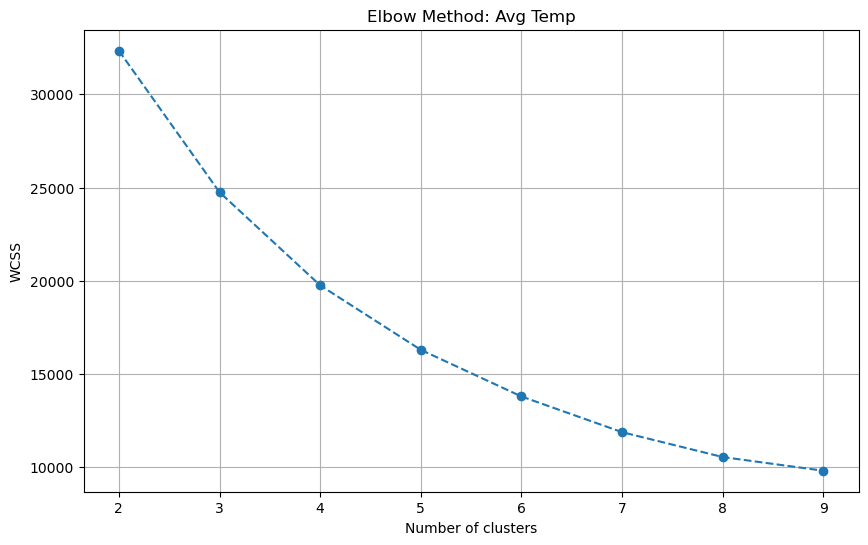

C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\clust

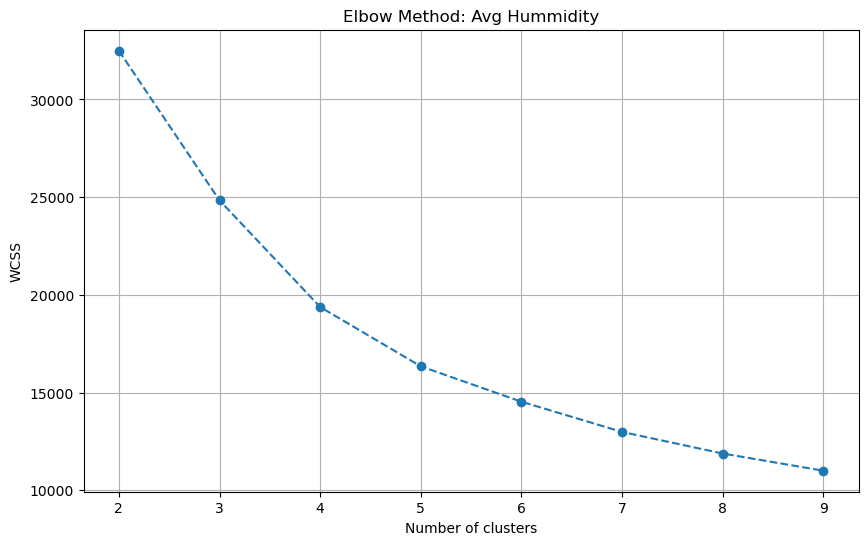

C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\clust

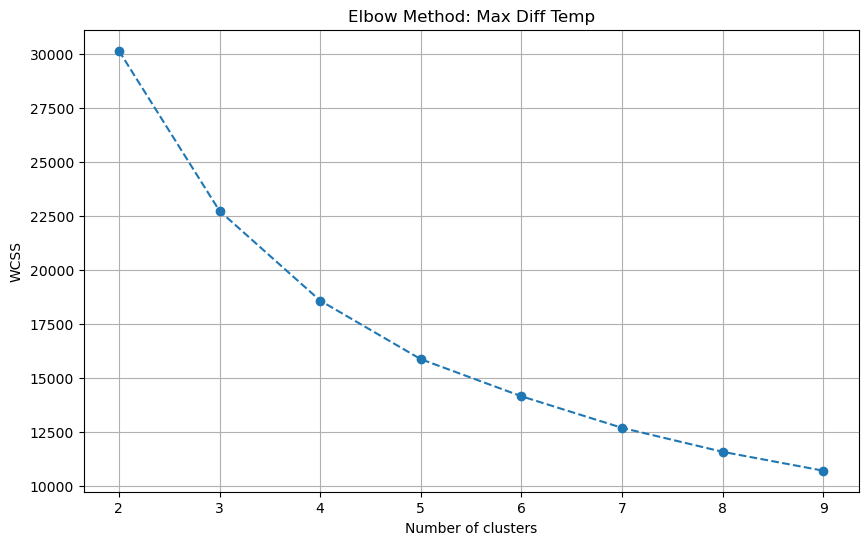

C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\clust

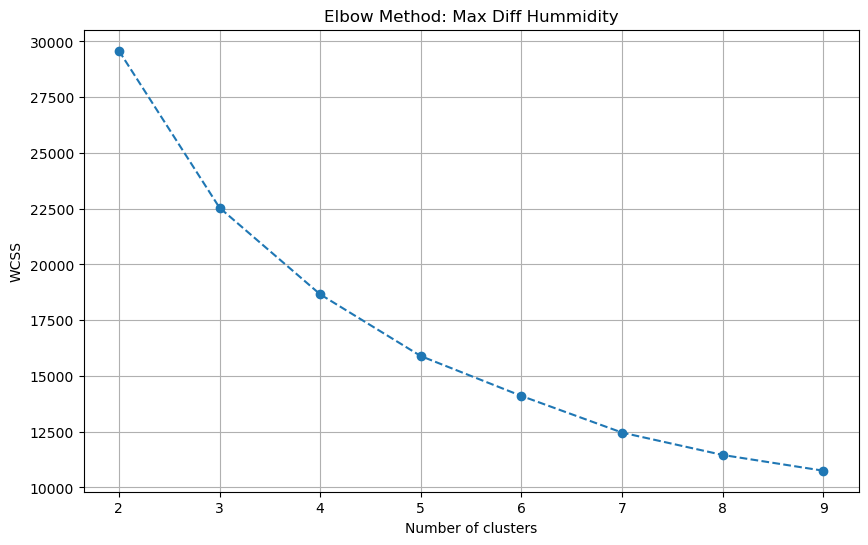

In [119]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

for sequence_df in sequences:
    # Standardize the data
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequence_df)

    # Define a range of possible clusters
    clusters_range = range(2, 10)

    # Calculate WCSS (Within-Cluster-Sum-of-Squares) for different numbers of clusters
    wcss = []
    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(sequences_scaled)
        wcss.append(kmeans.inertia_)

    # Plot the WCSS values
    plt.figure(figsize=(10, 6))
    plt.plot(clusters_range, wcss, marker='o', linestyle='--')
    plt.title('Elbow Method: ' + sequence_df.name)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()


C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


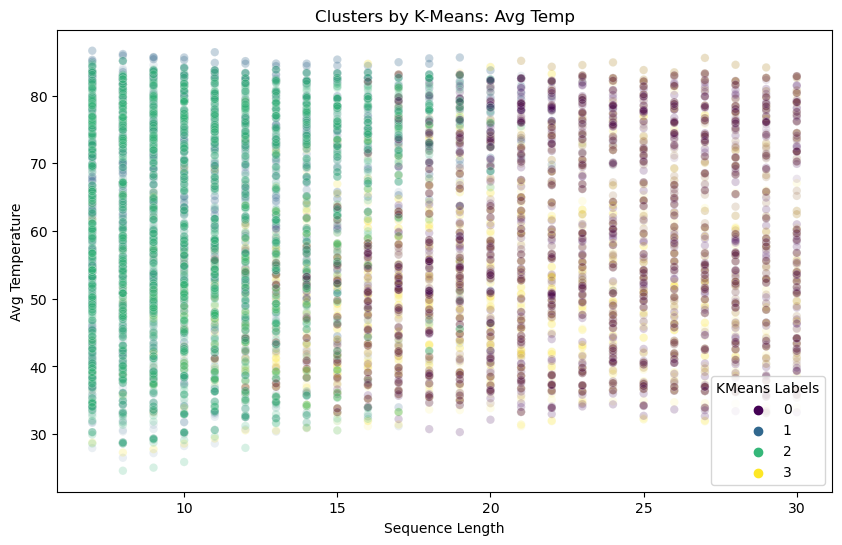

C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


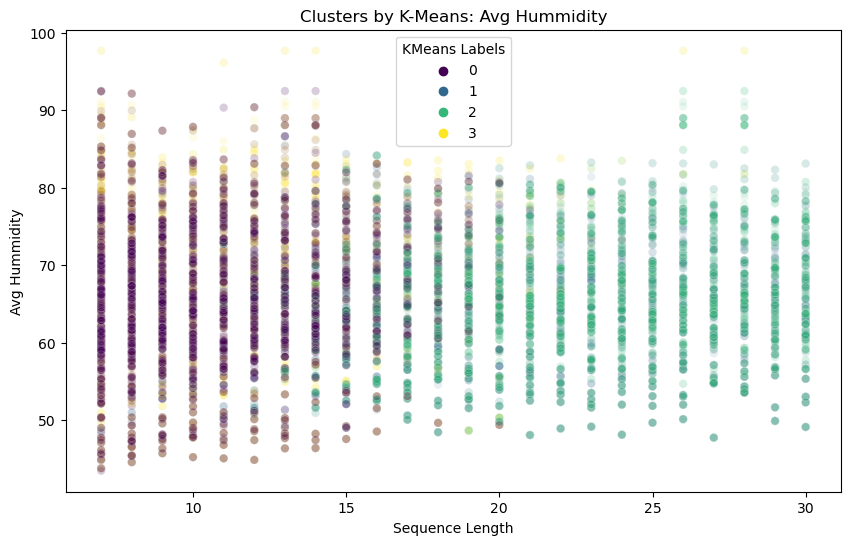

C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


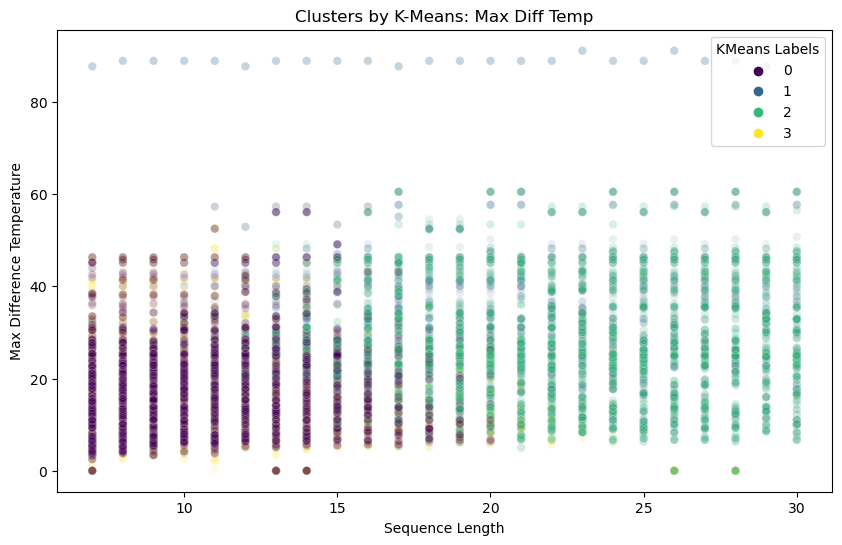

C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


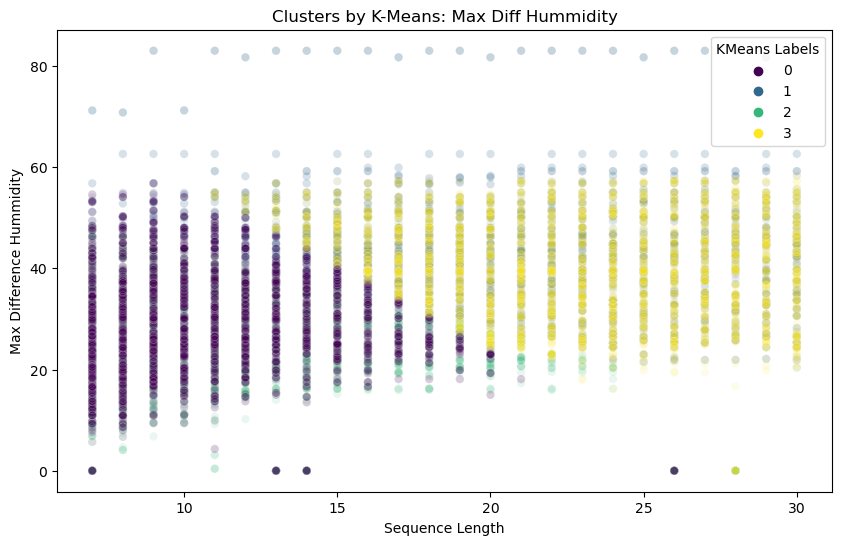

In [133]:
import seaborn as sns
clusters_per_sequence = [4,4,4,4]


for i in range(len(sequences)):
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequences[i])
    # Fit K-Means
    kmeans = KMeans(n_clusters=clusters_per_sequence[i], random_state=42)
    sequences[i]['KMeans Labels'] = kmeans.fit_predict(sequences_scaled)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sequences[i], x='Sequence Length', y=sequences[i].columns[2], hue='KMeans Labels', palette='viridis', alpha = 0.1)
    plt.title('Clusters by K-Means: ' + sequences[i].name)
    plt.show()


In [135]:
for i in sequences:
    print(i['KMeans Labels'])

0        1
1        1
2        1
3        1
4        3
        ..
14470    0
14471    0
14472    0
14473    0
14474    0
Name: KMeans Labels, Length: 14475, dtype: int32
0        3
1        3
2        3
3        3
4        1
        ..
14470    2
14471    2
14472    2
14473    2
14474    2
Name: KMeans Labels, Length: 14475, dtype: int32
0        3
1        3
2        3
3        3
4        1
        ..
14470    2
14471    2
14472    2
14473    2
14474    2
Name: KMeans Labels, Length: 14475, dtype: int32
0        2
1        2
2        2
3        2
4        1
        ..
14470    3
14471    3
14472    3
14473    3
14474    3
Name: KMeans Labels, Length: 14475, dtype: int32


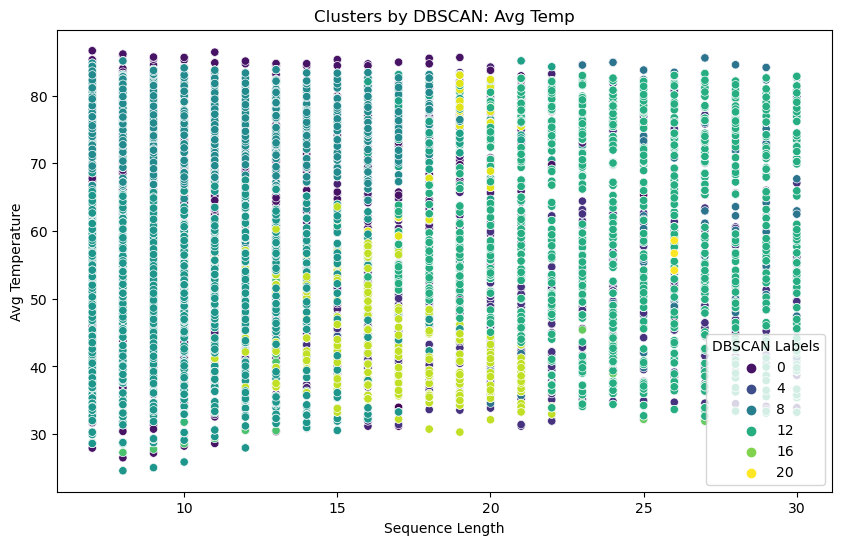

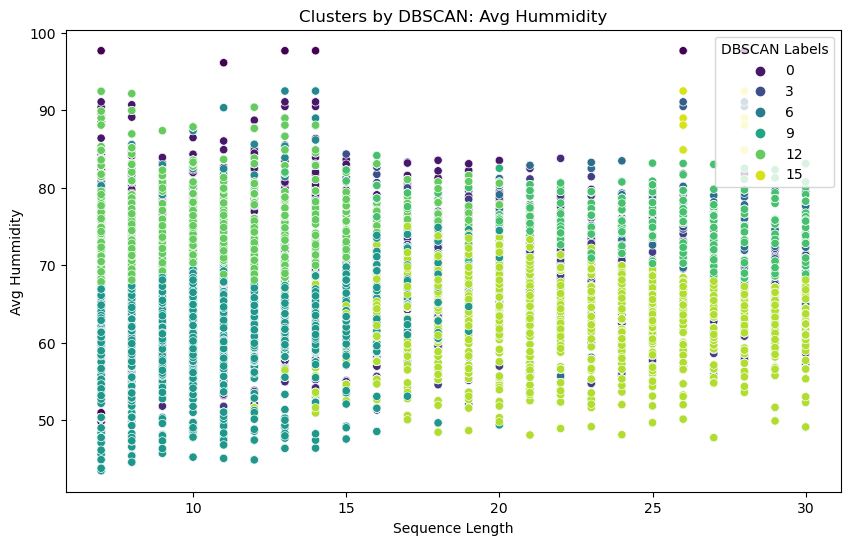

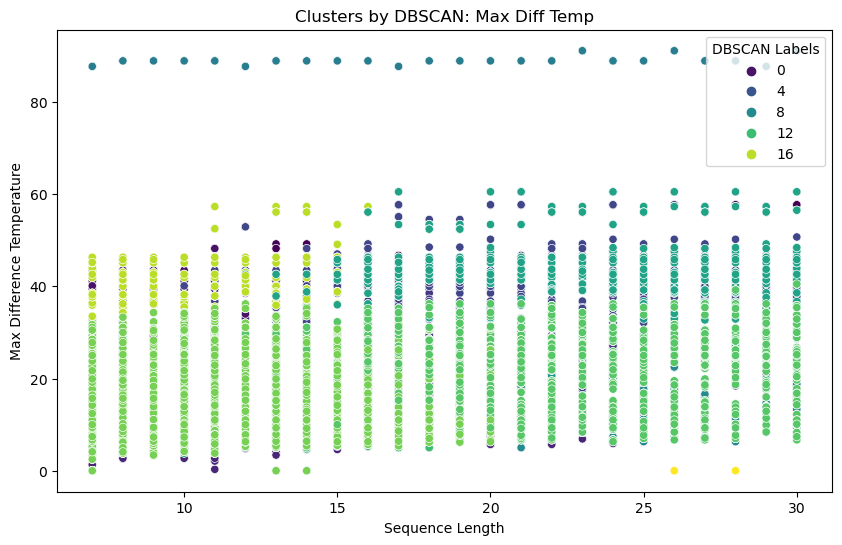

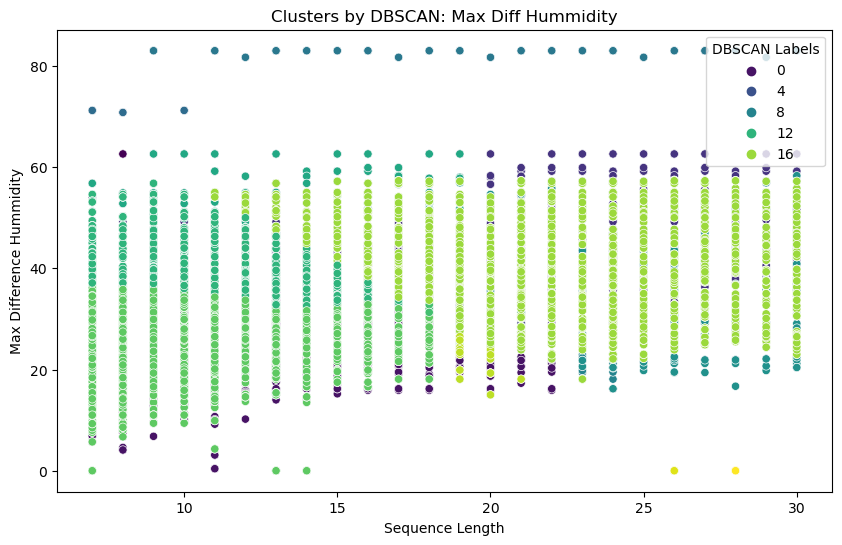

In [136]:
from sklearn.cluster import DBSCAN

for sequence_df in sequences:
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequence_df)
    # Fit DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    sequence_df['DBSCAN Labels'] = dbscan.fit_predict(sequences_scaled)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sequence_df, x='Sequence Length', y=sequence_df.columns[2], hue='DBSCAN Labels', palette='viridis')
    plt.title('Clusters by DBSCAN: ' + sequence_df.name)
    plt.show()


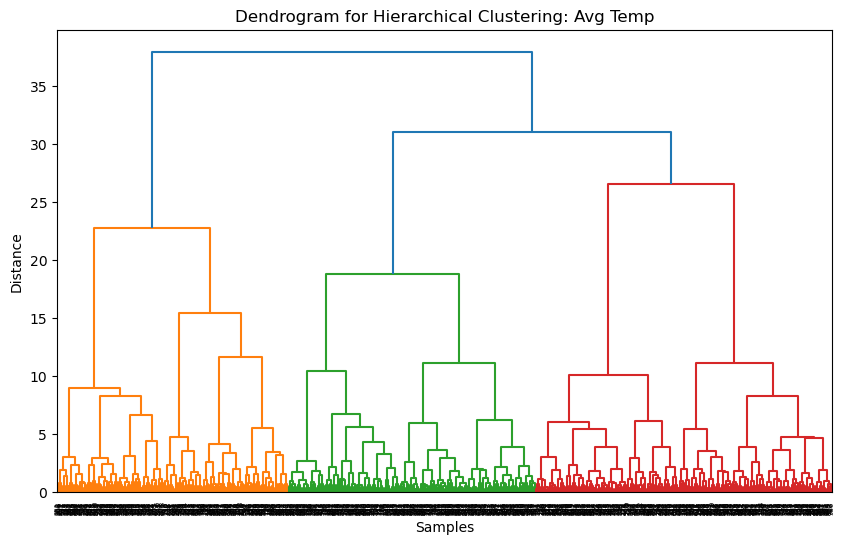

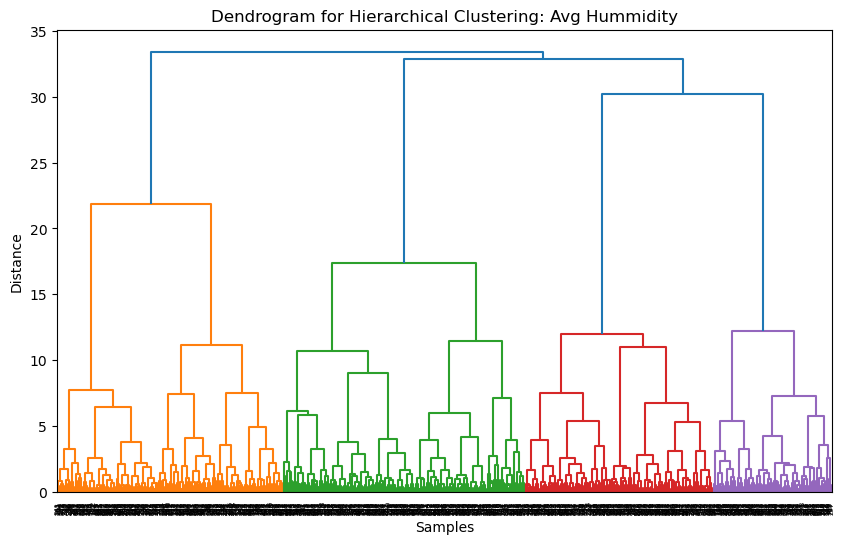

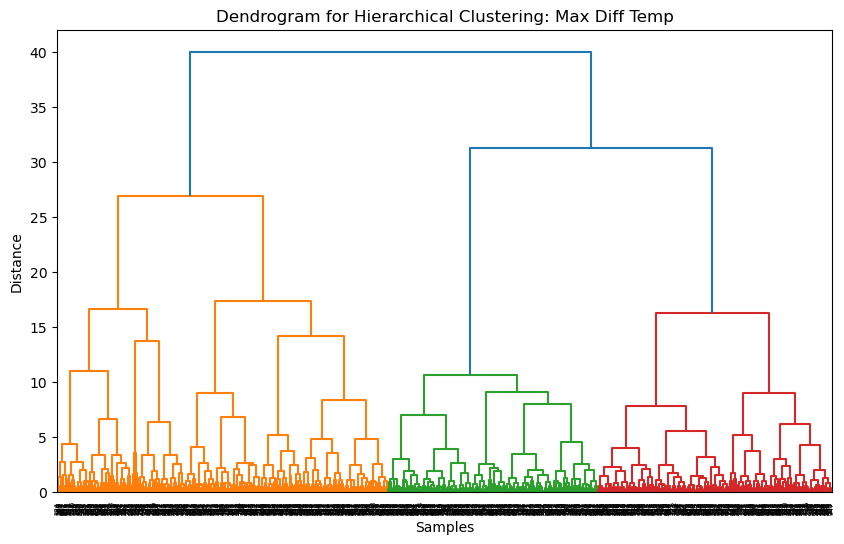

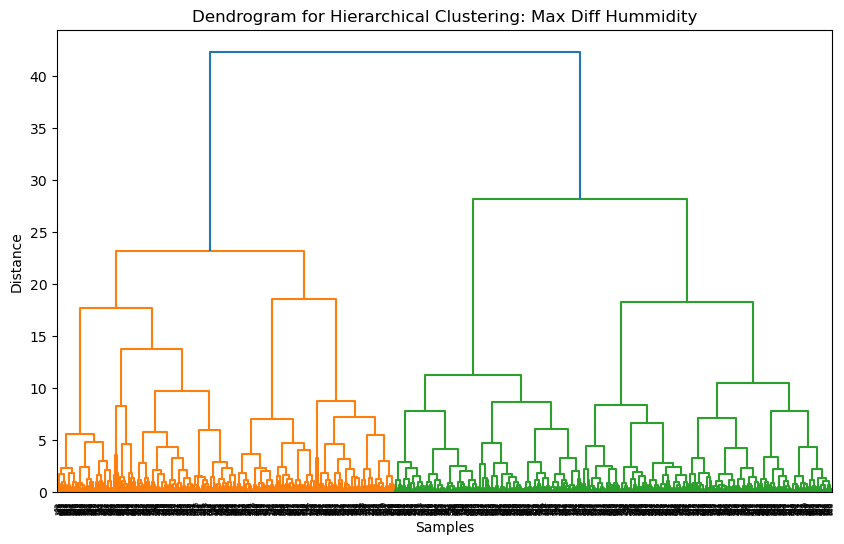

In [137]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt



for sequence_df in sequences:
    # Use only a subset of data for dendrogram for efficiency
    subset = sequence_df.sample(n=1000, random_state=42)

    # Standardize the subset
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequence_df[sequence_df.columns[:3]])
    subset_scaled = scaler.transform(subset[sequence_df.columns[:3]])

    # Perform hierarchical clustering
    linked = linkage(subset_scaled, 'ward')

    # Plot the dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linked)
    plt.title('Dendrogram for Hierarchical Clustering: ' + sequence_df.name)
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()





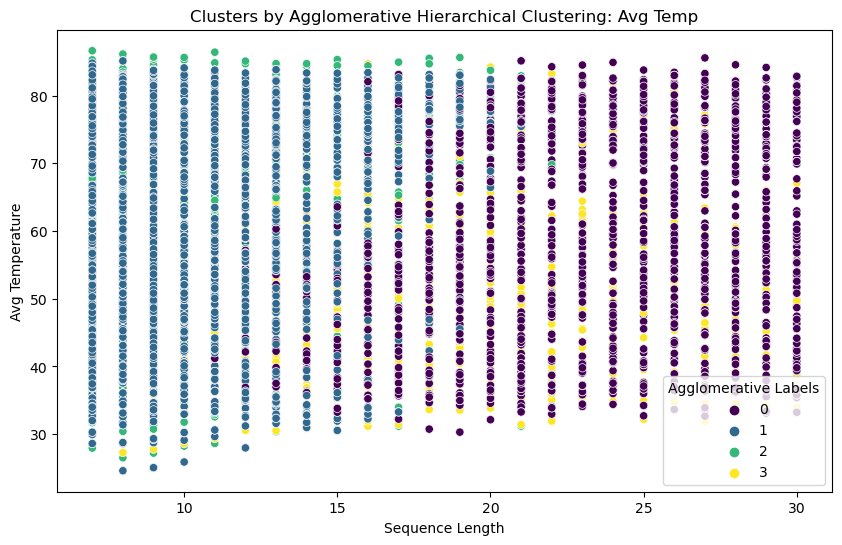

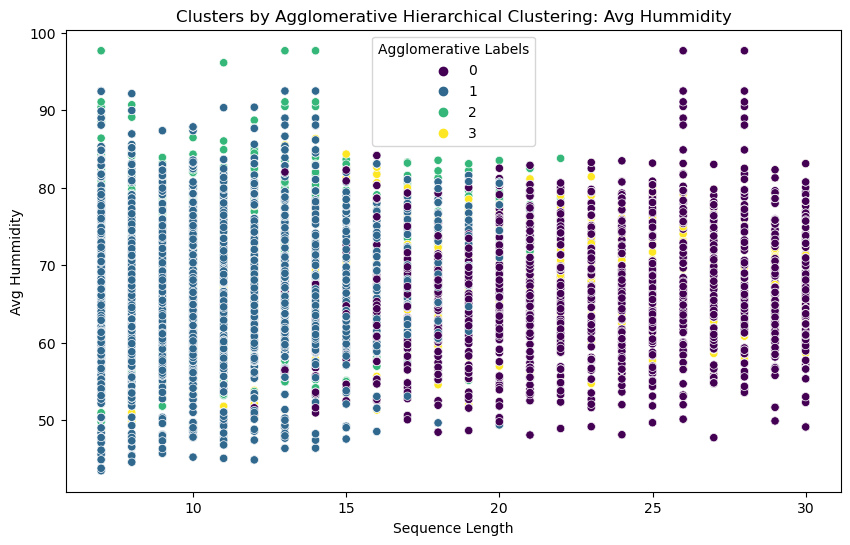

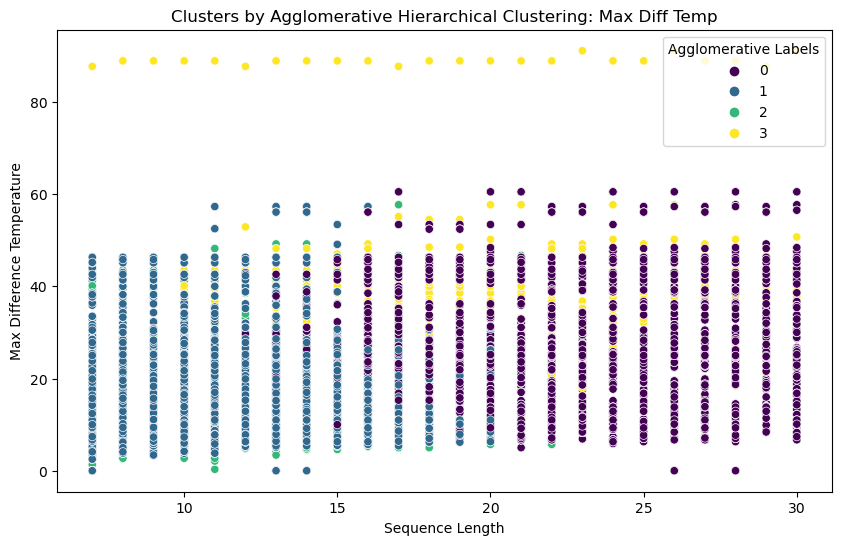

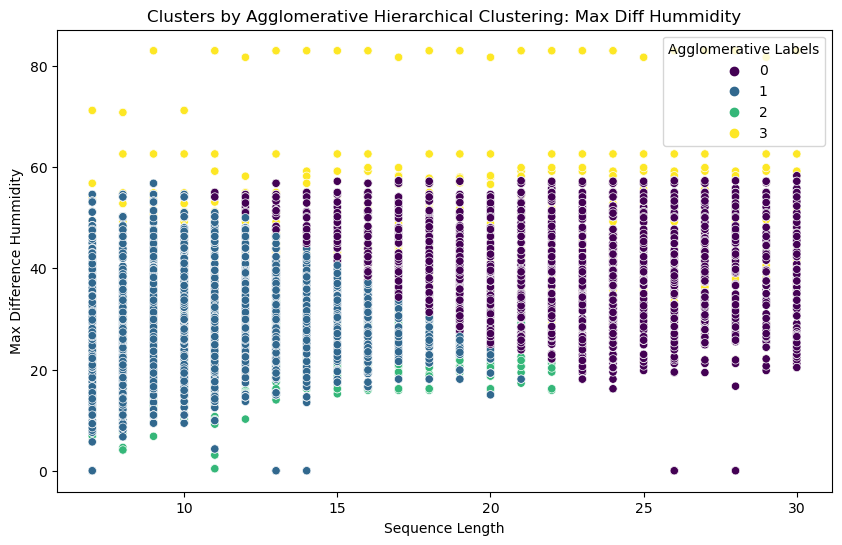

In [138]:
from sklearn.cluster import AgglomerativeClustering

clusters_per_sequence = [4,4,4,4]

for i in range(len(sequences)):

    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequence_df)

    # Fit Agglomerative Hierarchical Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=clusters_per_sequence[i])
    sequences[i]['Agglomerative Labels'] = agg_clustering.fit_predict(sequences_scaled)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sequences[i], x='Sequence Length', y= sequences[i].columns[2], hue='Agglomerative Labels', palette='viridis')
    plt.title('Clusters by Agglomerative Hierarchical Clustering: ' + sequences[i].name)
    plt.show()


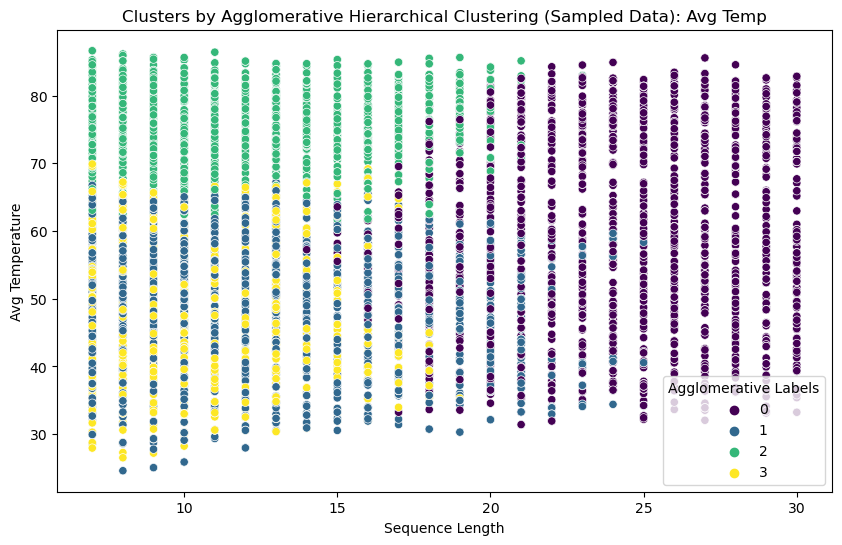

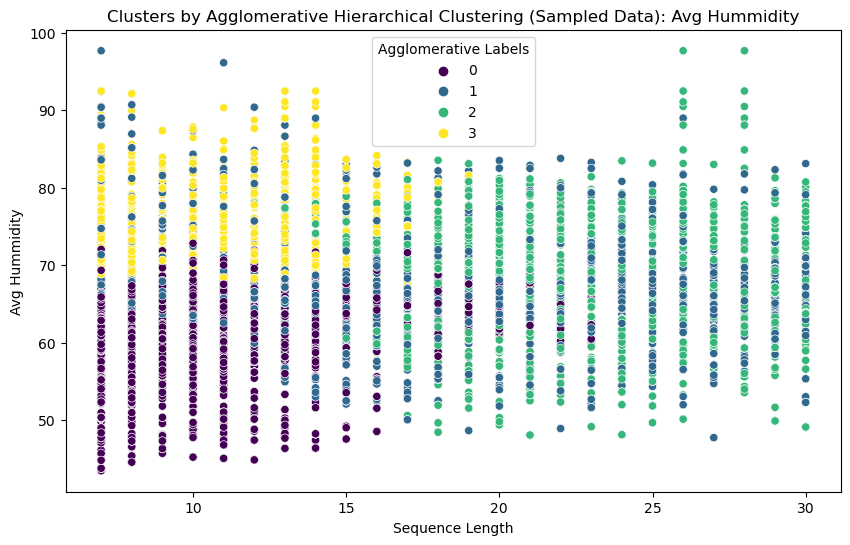

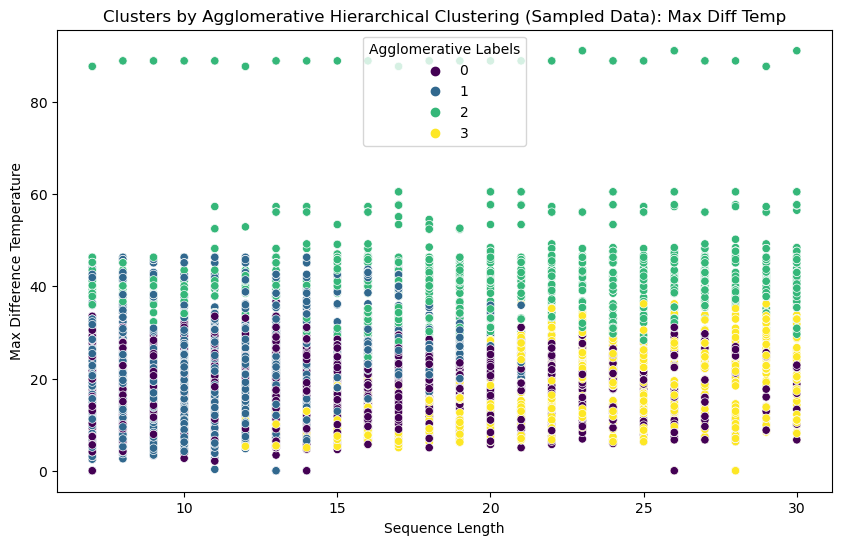

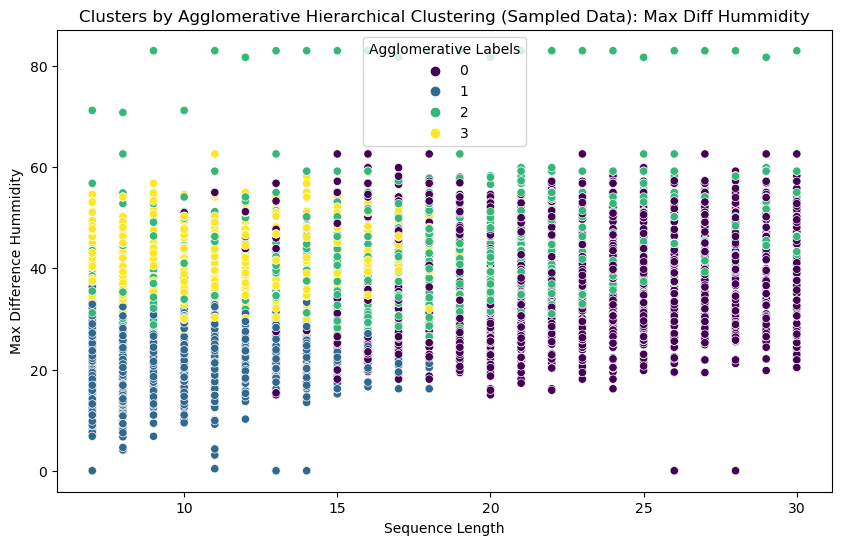

In [139]:
clusters_per_sequence = [4,4,4,4]
for i in range(len(sequences)):
    # Sample a subset of our data
    subset = sequences[i].sample(n=10000, random_state=42)

    # Standardize the subset
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequences[i][sequences[i].columns[:3]])
    subset_scaled = scaler.transform(subset[subset.columns[:3]])

    # Fit Agglomerative Hierarchical Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=clusters_per_sequence[i])
    subset['Agglomerative Labels'] = agg_clustering.fit_predict(subset_scaled)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=subset, x='Sequence Length', y= sequences[i].columns[2], hue='Agglomerative Labels', palette='viridis')
    plt.title('Clusters by Agglomerative Hierarchical Clustering (Sampled Data): ' + sequences[i].name)
    plt.show()


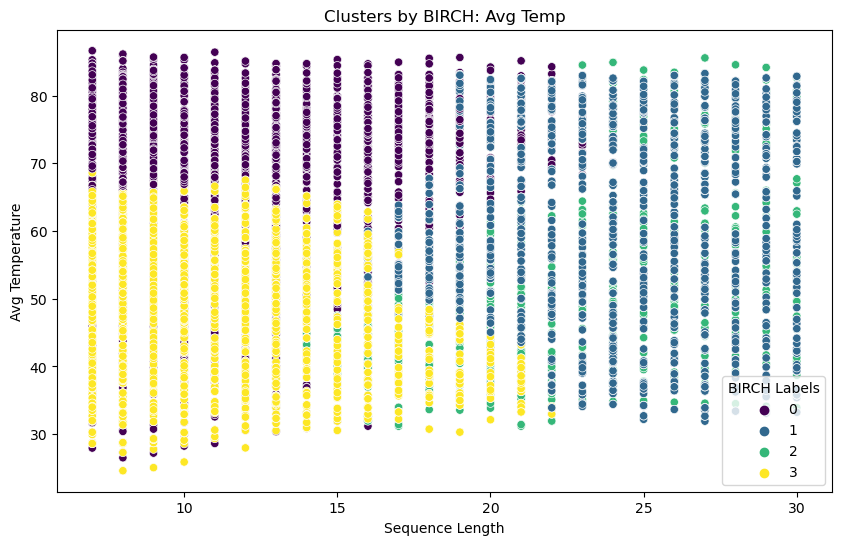

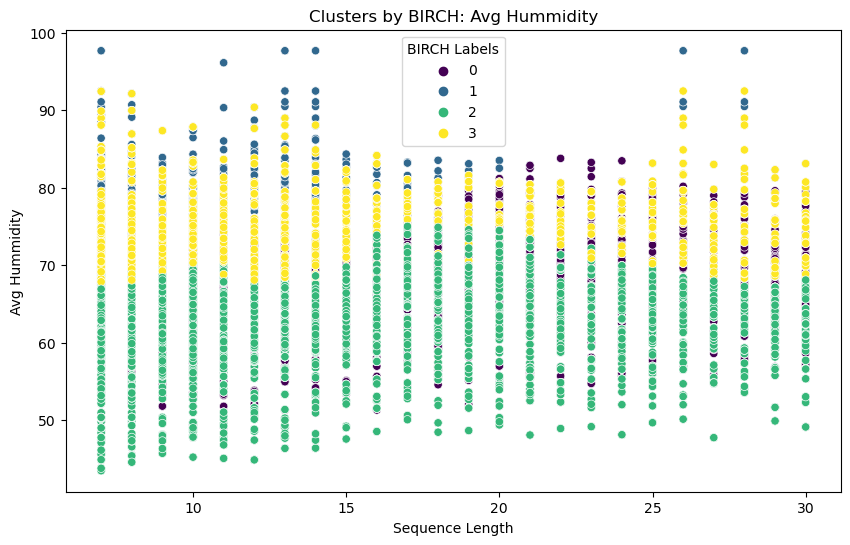

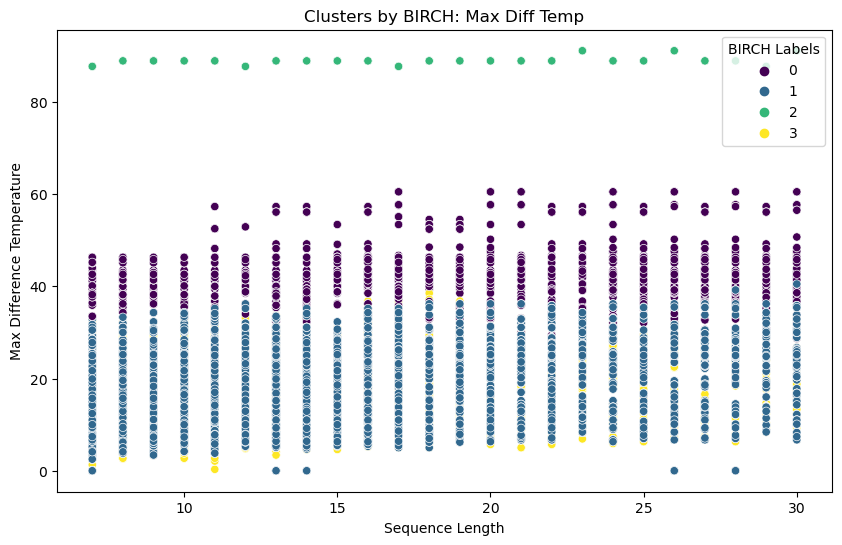

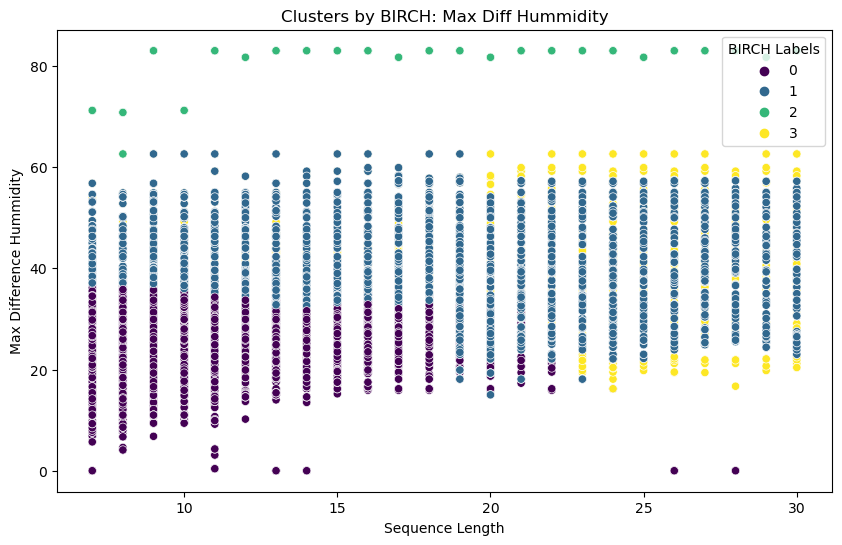

In [140]:
from sklearn.cluster import Birch
clusters_per_sequence = [4,4,4,4]
for i in range(len(sequences)):
    # Fit BIRCH
    birch = Birch(n_clusters=clusters_per_sequence[i])
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequences[i][sequences[i].columns[:3]])
    sequences[i]['BIRCH Labels'] = birch.fit_predict(sequences_scaled)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sequences[i], x='Sequence Length', y=sequences[i].columns[2], hue='BIRCH Labels', palette='viridis')
    plt.title('Clusters by BIRCH: ' + sequences[i].name)
    plt.show()


In [141]:
# Check unique DBSCAN labels
for sequence_df in sequences:
    unique_dbscan_labels = sequence_df['DBSCAN Labels'].unique()
    print('Unique DBSCAN Labels for ' + sequence_df.name)
    print(unique_dbscan_labels)  



Unique DBSCAN Labels for Avg Temp
[ 0  1  2  3  4 -1  5  6  7  8  9 10 11 12 13 14 17 15 16 18 19 20]
Unique DBSCAN Labels for Avg Hummidity
[ 0  1  2  3 -1  4  5  6  9  7  8 10 11 12 13 14 15 16]
Unique DBSCAN Labels for Max Diff Temp
[ 0  1  2  3  4  5 -1  6  7  8  9 10 11 12 13 14 15 16 17 18]
Unique DBSCAN Labels for Max Diff Hummidity
[ 0  1  2  3 -1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [142]:
from sklearn.metrics import calinski_harabasz_score

for sequence_df in sequences:
    # Compute Calinski-Harabasz scores
    kmeans_score = calinski_harabasz_score(sequences_scaled, sequence_df['KMeans Labels'])
    birch_score = calinski_harabasz_score(sequences_scaled, sequence_df['BIRCH Labels'])
    print('for ' + sequence_df.name)
    print('kmeans score: ' + str(kmeans_score) + ', birch score: ' + str(birch_score))


for Avg Temp
kmeans score: 6338.67832490533, birch score: 3691.6082116115927
for Avg Hummidity
kmeans score: 6355.579926480685, birch score: 1769.8168639355763
for Max Diff Temp
kmeans score: 6380.16042609579, birch score: 2027.1084460417483
for Max Diff Hummidity
kmeans score: 6400.915551144996, birch score: 3686.869444036347


# section 5

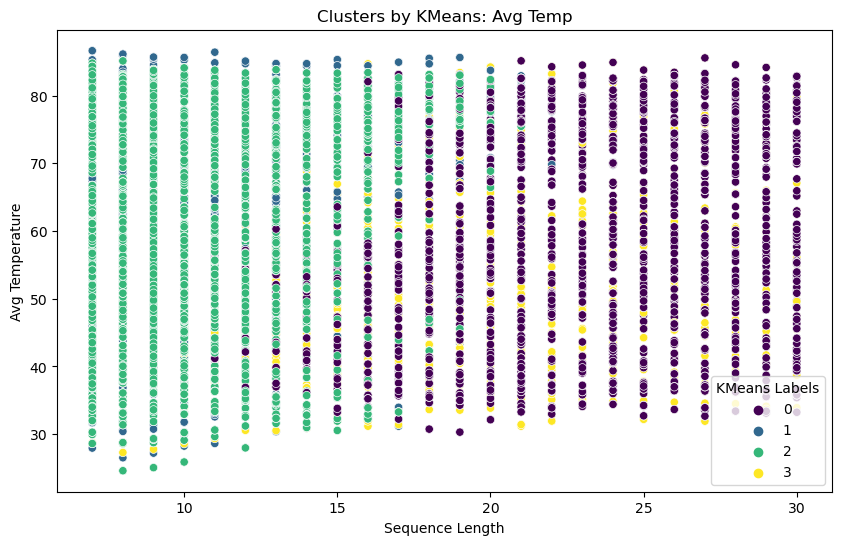

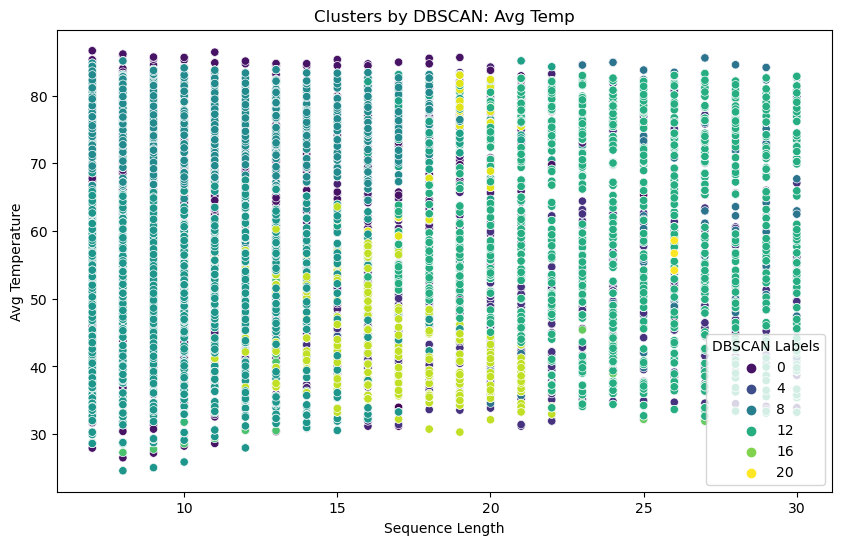

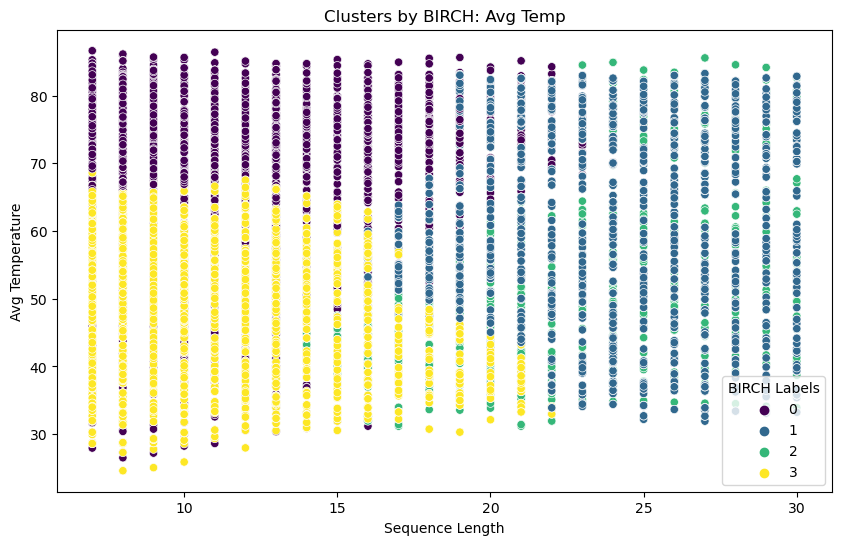

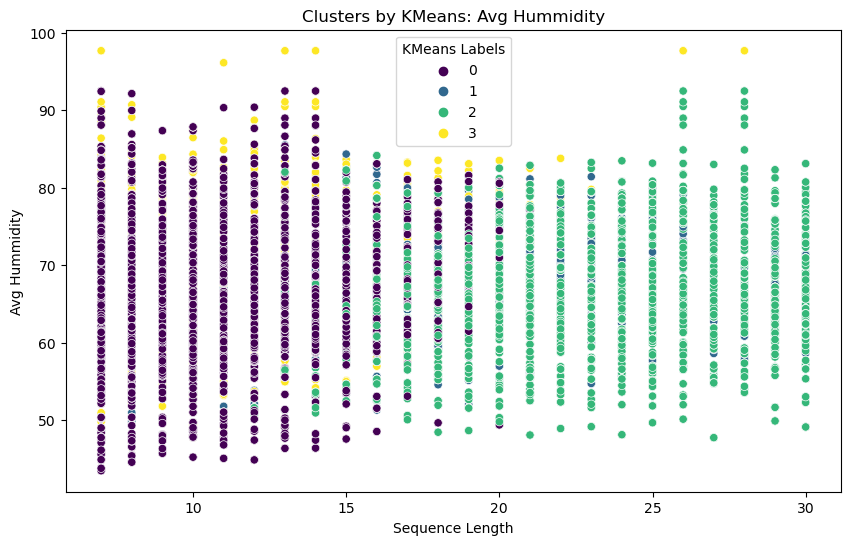

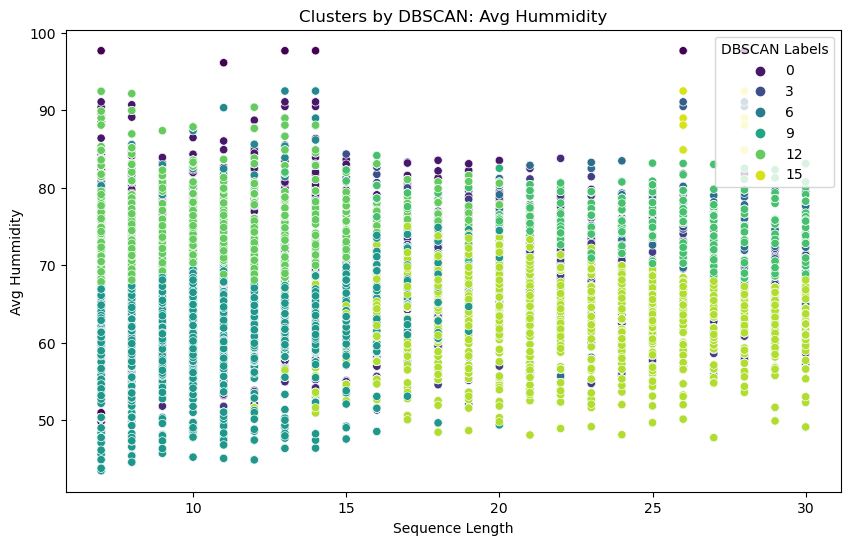

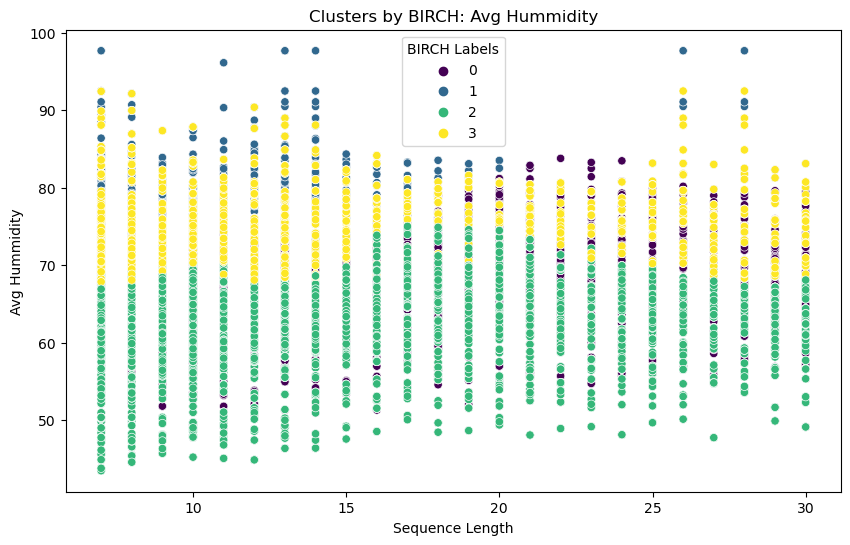

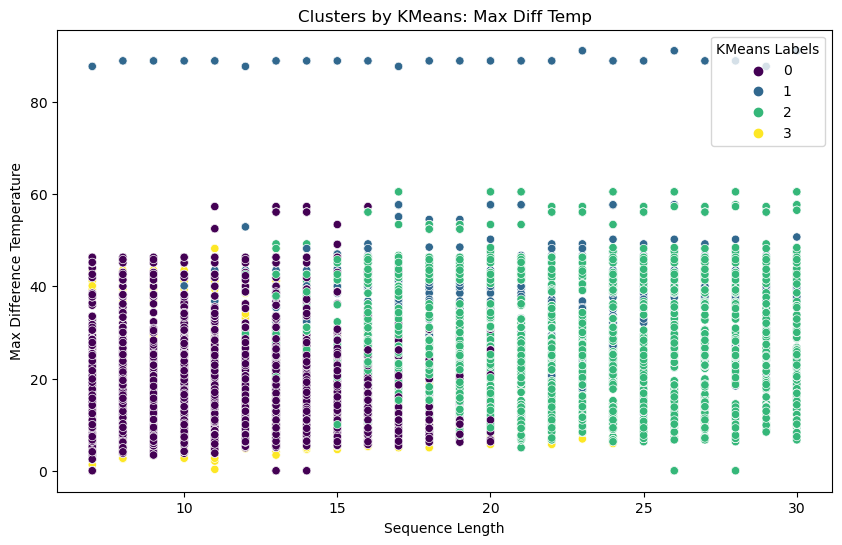

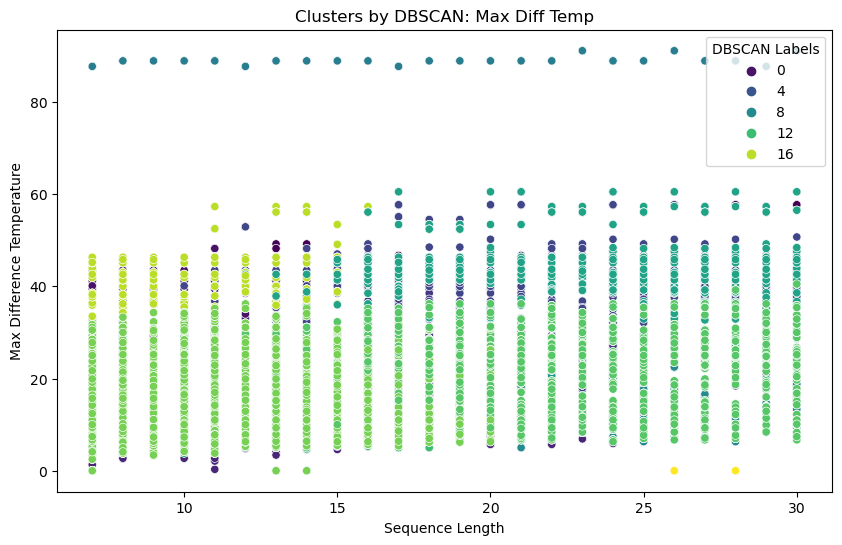

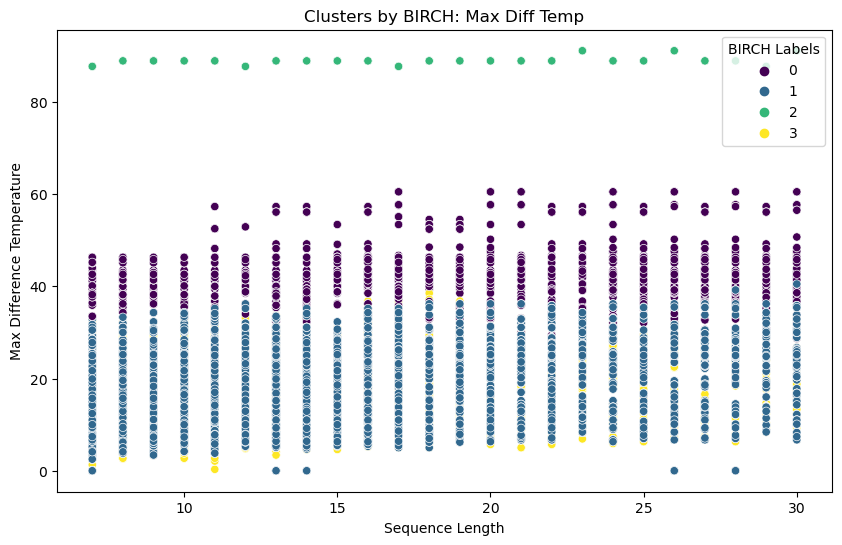

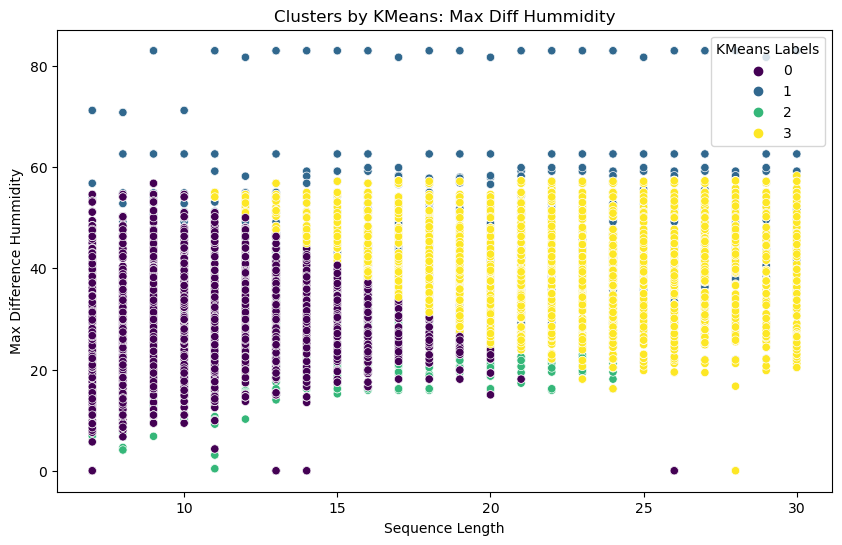

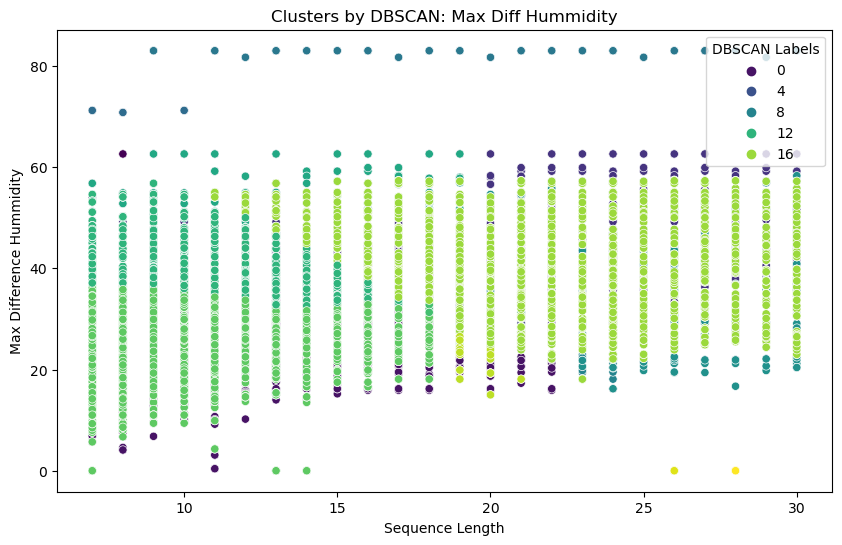

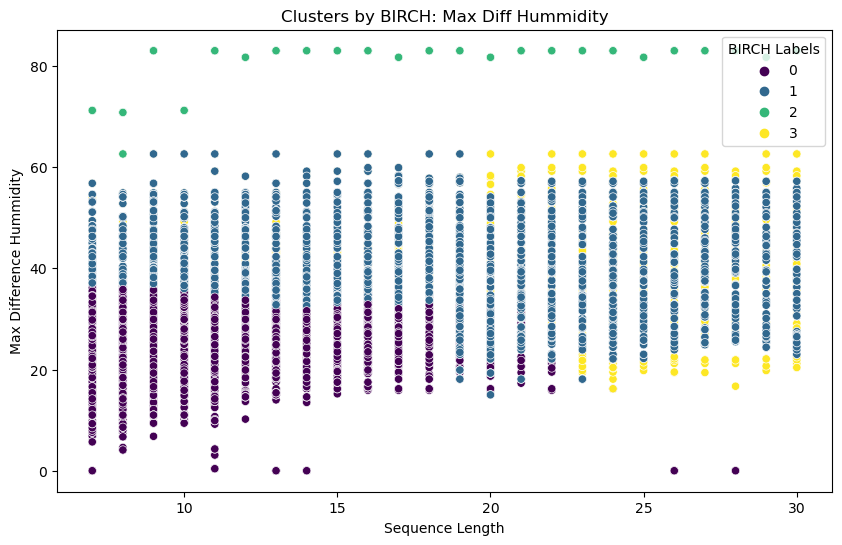

In [143]:
for sequence_df in sequences:
    # Visualize the results of KMeans
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sequence_df, x='Sequence Length', y= sequence_df.columns[2], hue='KMeans Labels', palette='viridis')
    plt.title('Clusters by KMeans: ' + sequence_df.name)
    plt.show()

    # Visualize the results of DBSCAN
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sequence_df, x='Sequence Length', y=sequence_df.columns[2], hue='DBSCAN Labels', palette='viridis')
    plt.title('Clusters by DBSCAN: ' + sequence_df.name)
    plt.show()

    # Visualize the results of BIRCH
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sequence_df, x='Sequence Length', y= sequence_df.columns[2], hue='BIRCH Labels', palette='viridis')
    plt.title('Clusters by BIRCH: ' + sequence_df.name)
    plt.show()


צריך לזכור לעבור על המסקנות ולעדכן!!!

KMeans Clustering

The scatter plot shows sequences categorized into 4 clusters based on their average temperature and sequence length. It's clear that KMeans has grouped the sequences into distinct, non-overlapping clusters.

DBSCAN

DBSCAN has marked all sequences as noise (indicated by all points being in the same color). This shows that DBSCAN didn't perform well on this dataset.

BIRCH

BIRCH also grouped the sequences into 4 clusters, but the boundaries between the clusters are less clear compared to KMeans. This is especially noticeable between the two clusters in the middle of the plot.

These visualizations align with our discussion on the advantages and disadvantages of each method, and the results from the Calinski-Harabasz score.

# section 6

In [20]:
# Count the number of data points for each city
city_counts = sequences_df['City'].value_counts()

# Show the top 5 cities with the most data points
city_counts.head(5)


0     579
13    579
23    579
22    579
21    579
Name: City, dtype: int64

In [21]:
# Create a new DataFrame for City 0
city0_df = sequences_df[sequences_df['City'] == 0].copy()

# Reset the index
city0_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the new DataFrame
city0_df.head()


City  Sequence Length  Avg Temperature  KMeans Labels  \
0     0                7        39.828571              2   
1     0                7        36.885714              2   
2     0                7        33.542857              2   
3     0                7        34.728571              2   
4     0                7        39.100000              2   

   Agglomerative Labels  BIRCH Labels  DBSCAN Labels  
0                     2             0              0  
1                     2             0              0  
2                     2             0              0  
3                     2             0              0  
4                     2             0              0

In [22]:
from sklearn.metrics import mean_squared_error

# Calculate the simple moving average
city0_df['SMA_7'] = city0_df['Avg Temperature'].rolling(window=7).mean()

# Drop the first 6 rows which have NaN values in the SMA_7 column
city0_df = city0_df.iloc[6:]

# Calculate the mean squared error of the SMA predictions
sma_mse = mean_squared_error(city0_df['Avg Temperature'], city0_df['SMA_7'])

# Display the mean squared error
sma_mse


122.07592416129748

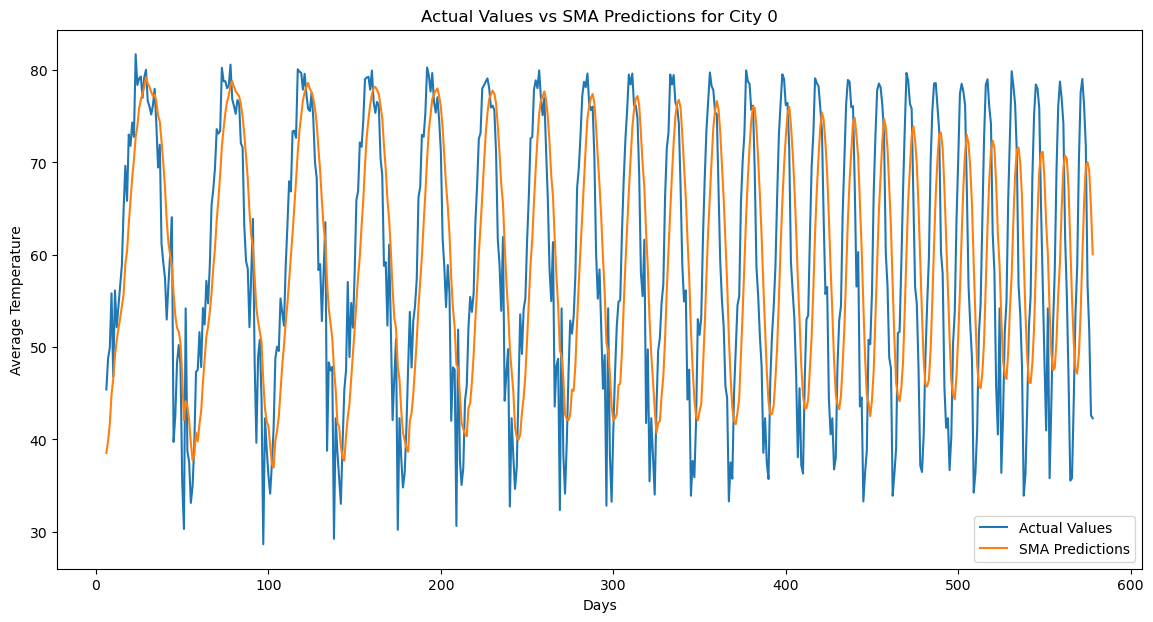

In [23]:
# Plot the actual values and the SMA predictions
plt.figure(figsize=(14, 7))
plt.plot(city0_df['Avg Temperature'], label='Actual Values')
plt.plot(city0_df['SMA_7'], label='SMA Predictions')
plt.title('Actual Values vs SMA Predictions for City 0')
plt.xlabel('Days')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()


In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the Simple Exponential Smoothing model
model = SimpleExpSmoothing(city0_df['Avg Temperature']).fit(smoothing_level=0.2)

# Make predictions
city0_df['SES_Predictions'] = model.predict(start=0, end=len(city0_df)-1)

# Calculate the mean squared error of the SES predictions
ses_mse = mean_squared_error(city0_df['Avg Temperature'], city0_df['SES_Predictions'])

# Display the mean squared error
ses_mse


150.04936343390625

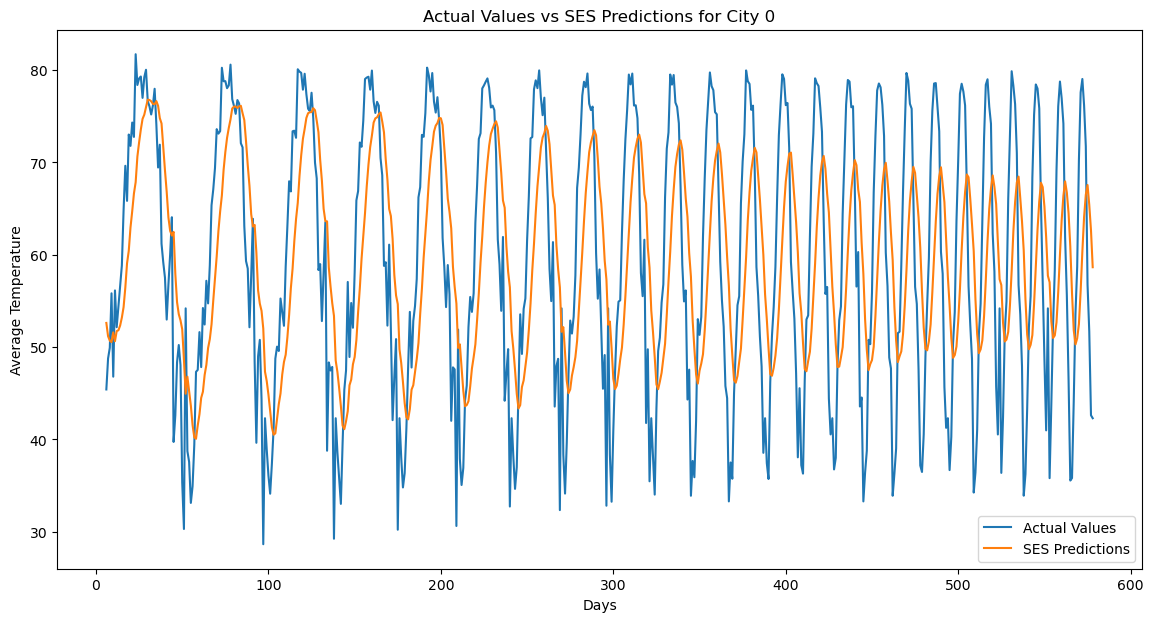

In [25]:
# Plot the actual values and the SES predictions
plt.figure(figsize=(14, 7))
plt.plot(city0_df['Avg Temperature'], label='Actual Values')
plt.plot(city0_df['SES_Predictions'], label='SES Predictions')
plt.title('Actual Values vs SES Predictions for City 0')
plt.xlabel('Days')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()


In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(city0_df['Avg Temperature'], order=(1, 0, 0))
model_fit = model.fit()

# Make predictions
city0_df['ARIMA_Predictions'] = model_fit.predict(start=0, end=len(city0_df)-1)

# Calculate the mean squared error of the ARIMA predictions
arima_mse = mean_squared_error(city0_df['Avg Temperature'], city0_df['ARIMA_Predictions'])

# Display the mean squared error
arima_mse


44.65243368492887

In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(city0_df['Avg Temperature'], order=(1, 0, 0))
model_fit = model.fit()

# Make predictions
city0_df['ARIMA_Predictions'] = model_fit.predict(start=0, end=len(city0_df)-1)

# Calculate the mean squared error of the ARIMA predictions
arima_mse = mean_squared_error(city0_df['Avg Temperature'], city0_df['ARIMA_Predictions'])

# Display the mean squared error
arima_mse


44.65243368492887

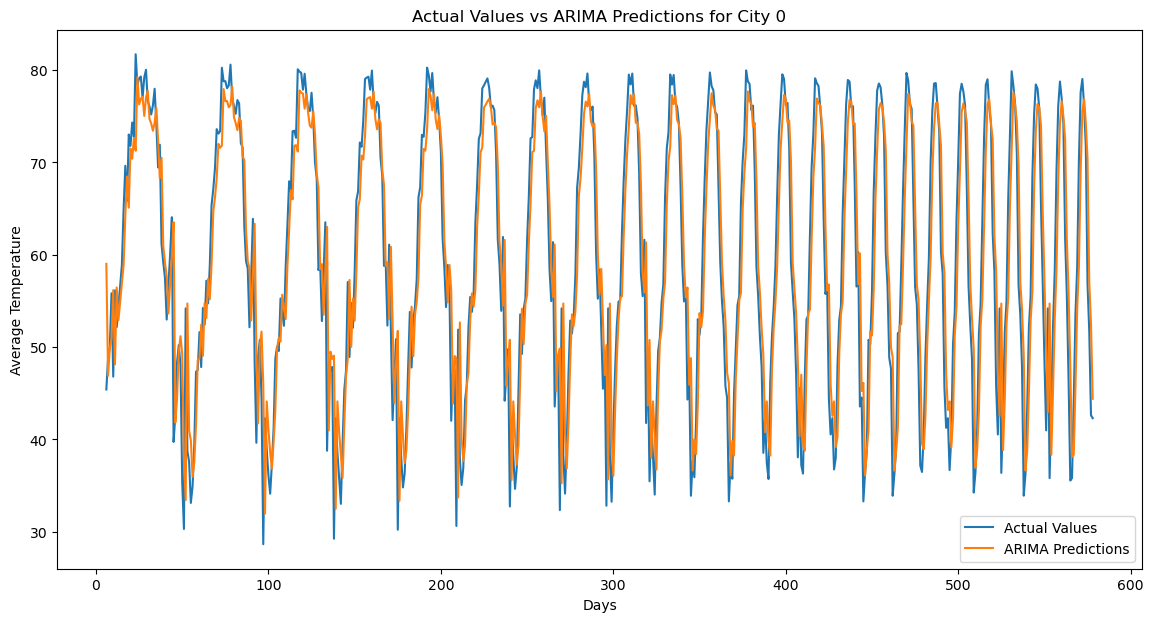

In [28]:
# Plot the actual values and the ARIMA predictions
plt.figure(figsize=(14, 7))
plt.plot(city0_df['Avg Temperature'], label='Actual Values')
plt.plot(city0_df['ARIMA_Predictions'], label='ARIMA Predictions')
plt.title('Actual Values vs ARIMA Predictions for City 0')
plt.xlabel('Days')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()


# section 7

C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yairs\anaconda3\lib\site-packages\sklearn\clust

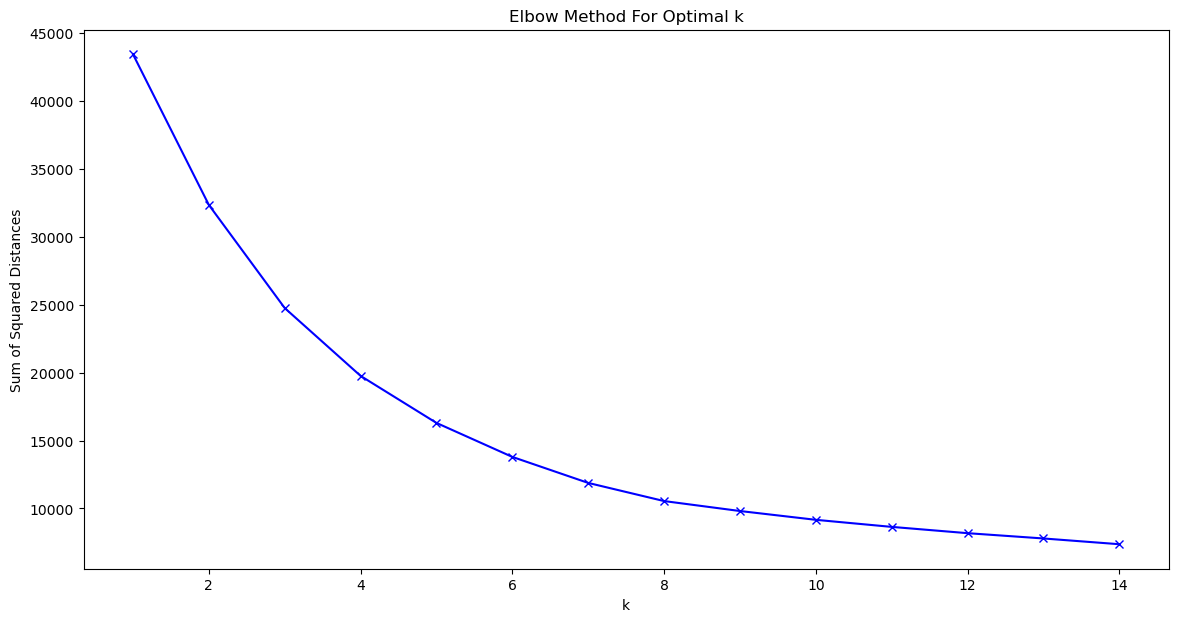

In [29]:
from sklearn.cluster import KMeans

# List to hold the sum of squared distances
ssd = []

# Range of k values to try
k_values = range(1, 15)

# Perform KMeans for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sequences_scaled)
    ssd.append(kmeans.inertia_)

# Generate the elbow plot
plt.figure(figsize=(14, 7))
plt.plot(k_values, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [30]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define the p, d and q parameters to take any value between 0 and 2
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq_values = list(itertools.product(p_values, d_values, q_values))

# Create a variable to store the best model parameters
best_pdq = None
best_aic = np.inf

# Perform grid search
for pdq in pdq_values:
    try:
        # Fit the ARIMA model
        model = ARIMA(city0_df['Avg Temperature'], order=pdq)
        model_fit = model.fit()

        # Check if the current model's AIC is lower than the best AIC
        if model_fit.aic < best_aic:
            best_pdq = pdq
            best_aic = model_fit.aic
    except:
        continue

# Print the best p, d, q values
print(f'Best ARIMA parameters: {best_pdq}')


C:\Users\yairs\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\yairs\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yairs\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Best ARIMA parameters: (2, 0, 2)


In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model with the optimal parameters
model = ARIMA(city0_df['Avg Temperature'], order=(2, 0, 2))
model_fit = model.fit()

# Make predictions
city0_df['ARIMA_Predictions'] = model_fit.predict(start=0, end=len(city0_df)-1)

# Calculate the mean squared error of the ARIMA predictions
arima_mse = mean_squared_error(city0_df['Avg Temperature'], city0_df['ARIMA_Predictions'])

# Display the mean squared error
print(arima_mse)


32.95082774058552
